In [1]:
import pandas as pd
import numpy as np
import feather

In [6]:
data = pd.read_feather("./data/fr/fr_topup_clean_data_long.feather")

In [8]:
uuids = set(data['PID'])

Add parameters:

In [89]:
def prop_other_report_blue(outcome_values):
    return [sum(outcome_values[:index+1]==1)/(index+1) for index, outcome in enumerate(outcome_values)]

In [92]:
def prop_subject_lied(subject_lied):
    return [sum(subject_lied[:index+1])/(index+1) for index, lie in enumerate(subject_lied)]

In [99]:
def signed_incongruence(col_picked, outcome):
    return [pick != report if report==1 else False for pick, report in zip(col_picked, outcome)]

In [109]:
dfs = []

for uuid in uuids:
    trials = data[data['PID']==uuid].reset_index()
    trials['prop_other_report_blue'] = prop_other_report_blue(trials['outcome'].values)
    trials['prop_subject_lied'] = prop_subject_lied(trials['subject_lied'].values)
    trials['signed_incongruence'] = signed_incongruence(trials['col_picked'].values, trials['outcome'].values)
    
    dfs.append(trials)

In [112]:
data = pd.concat(dfs)

Inspect potential autocorrelation in suspicion ratings:

In [113]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


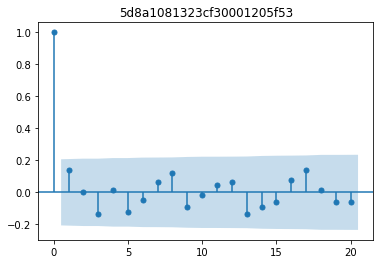

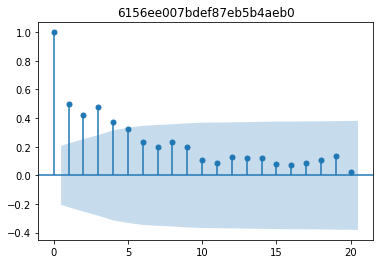

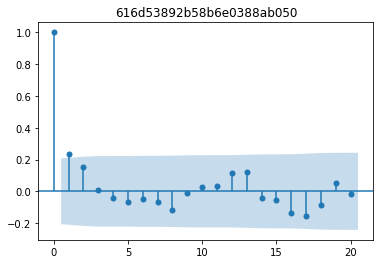

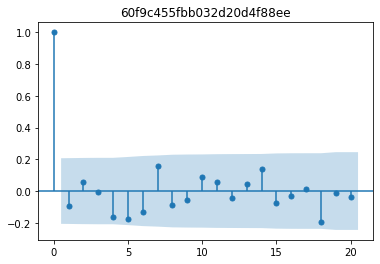

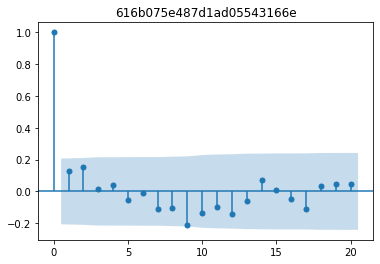

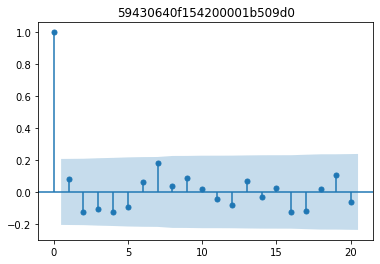

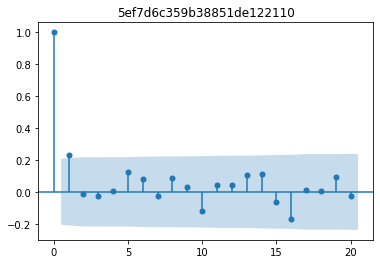

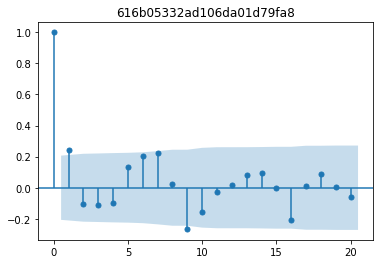

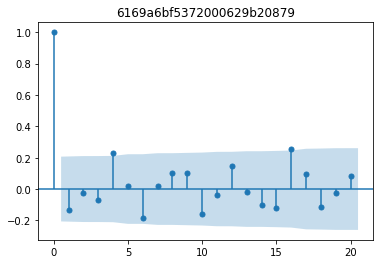

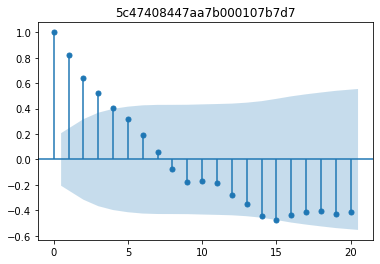

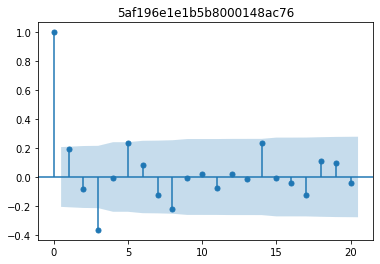

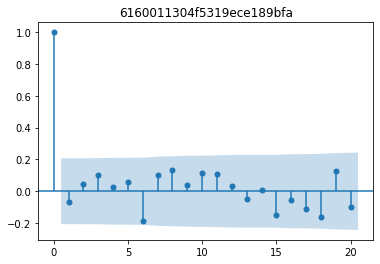

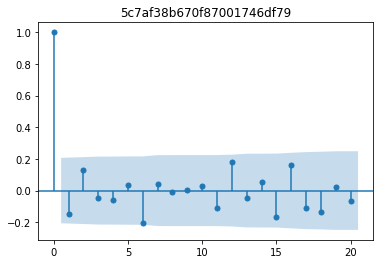

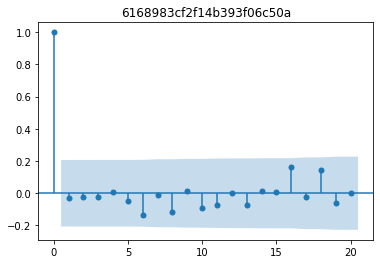

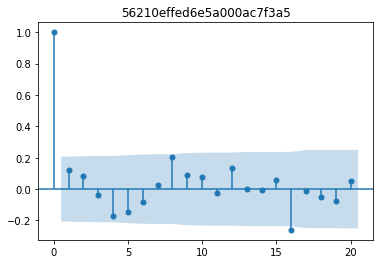

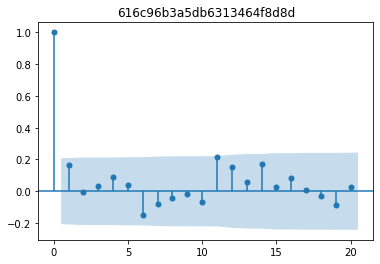

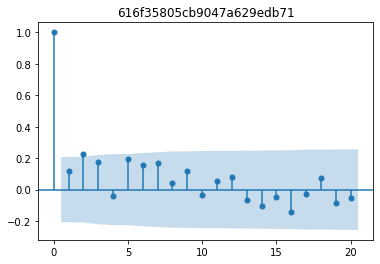

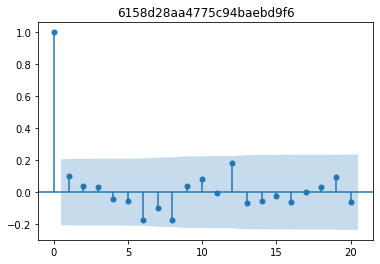

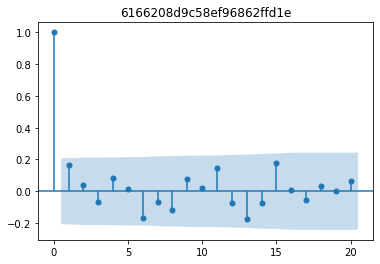

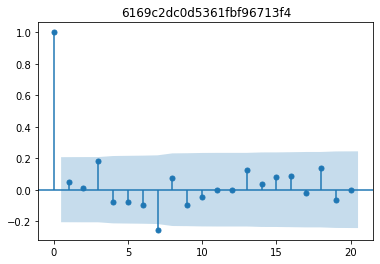

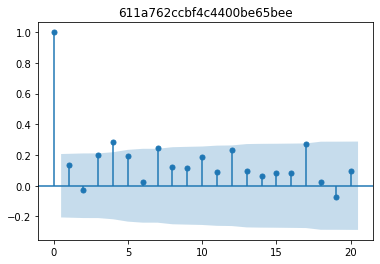

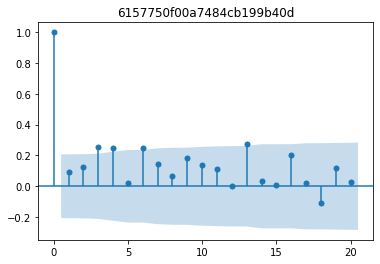

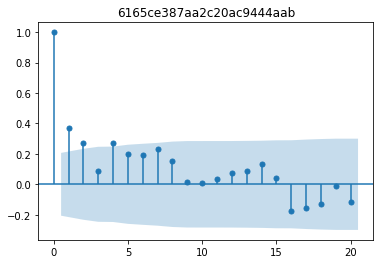

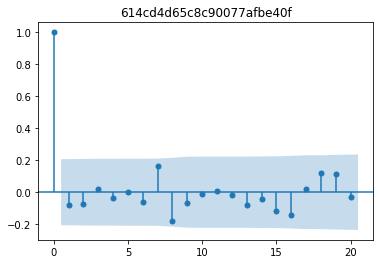

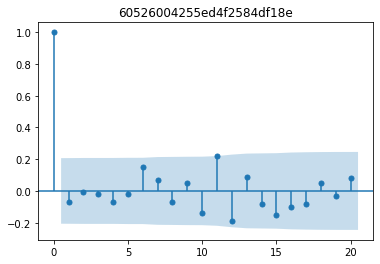

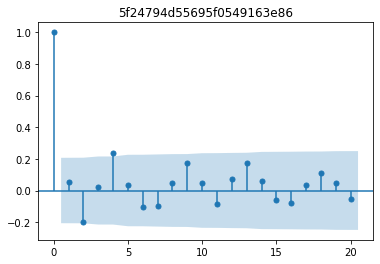

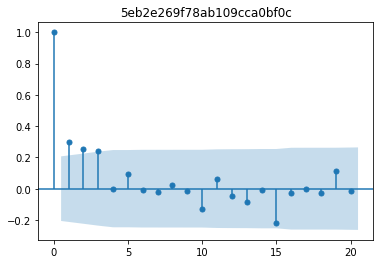

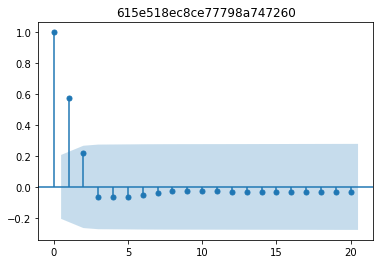

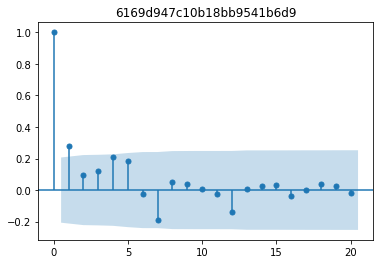

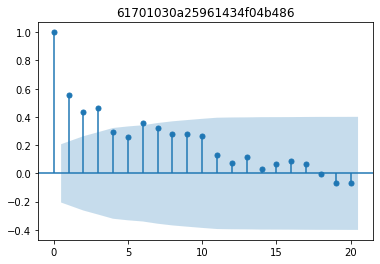

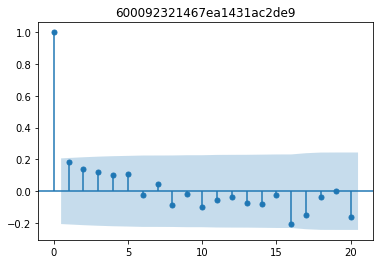

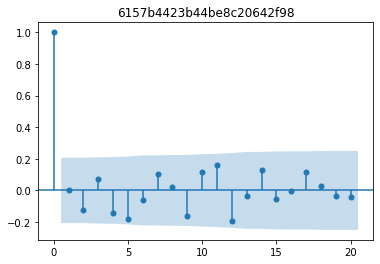

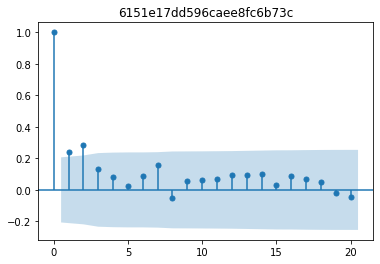

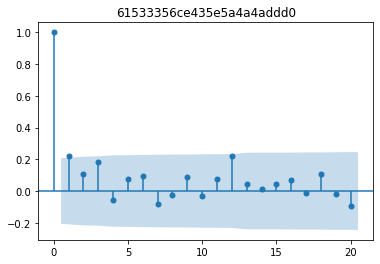

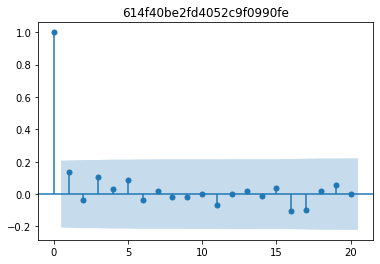

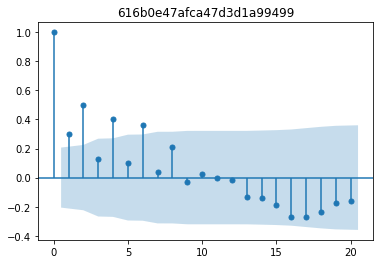

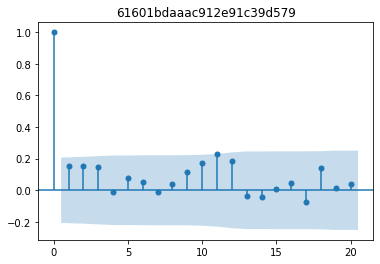

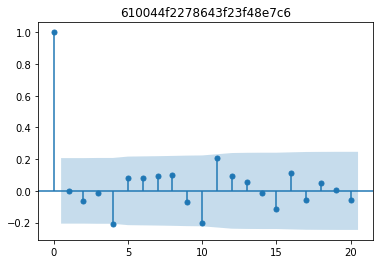

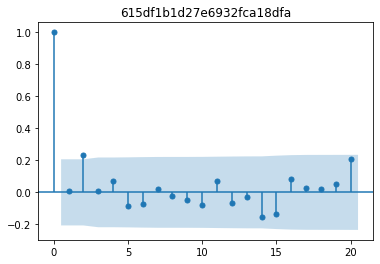

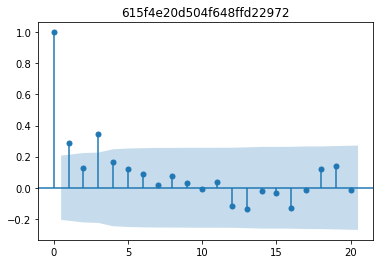

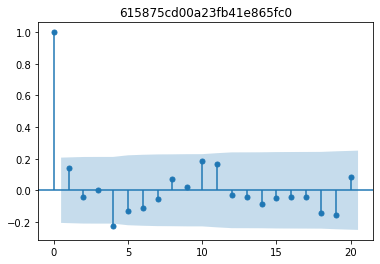

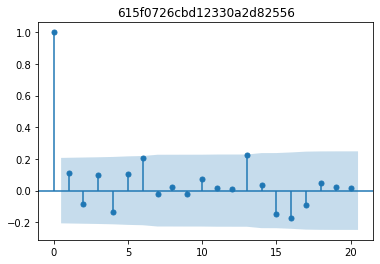

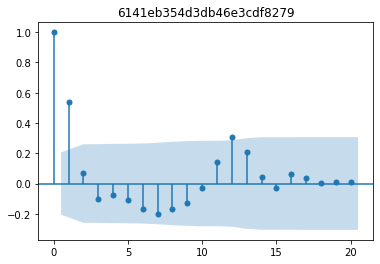

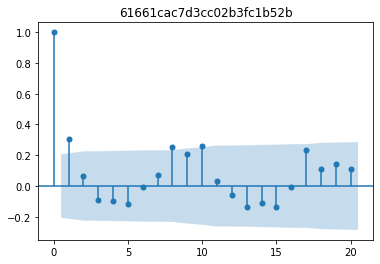

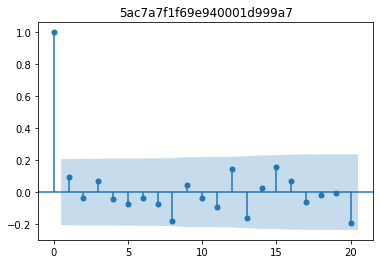

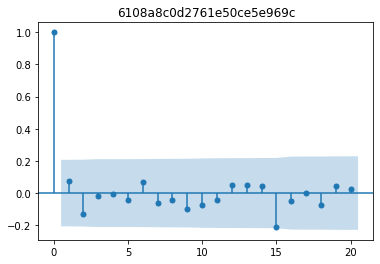

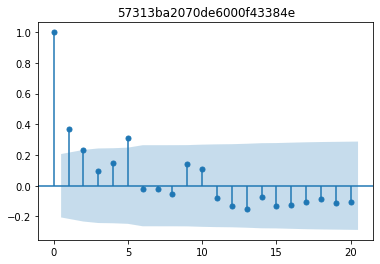

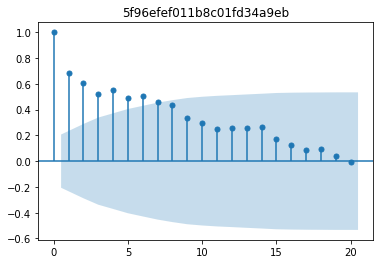

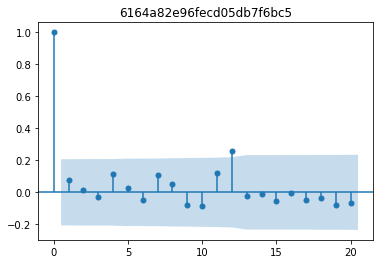

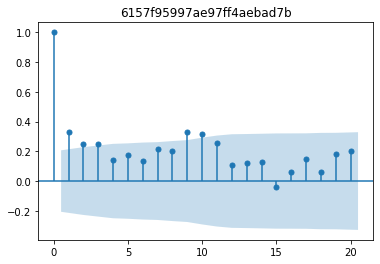

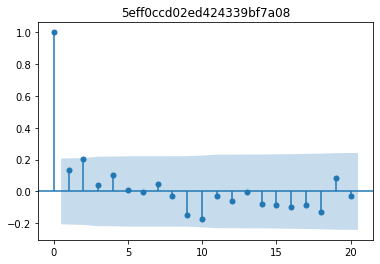

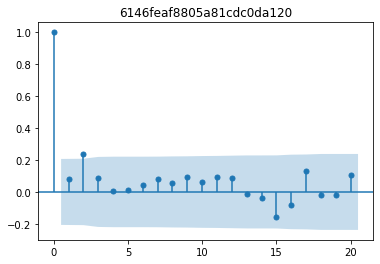

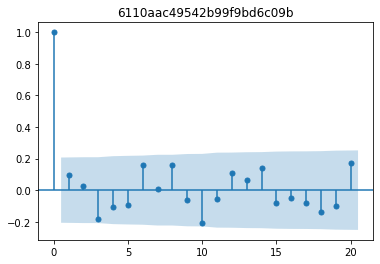

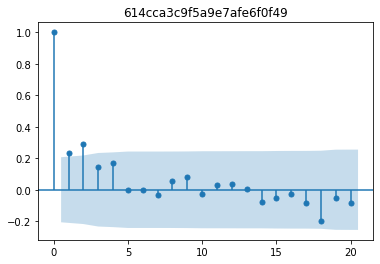

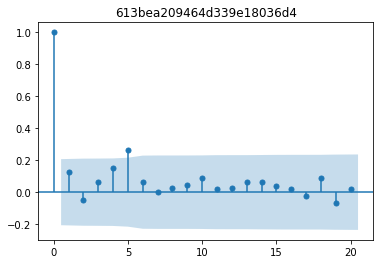

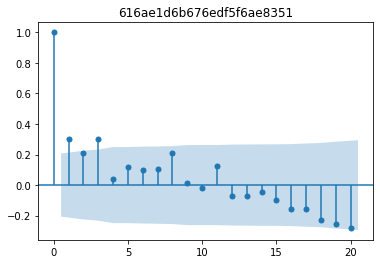

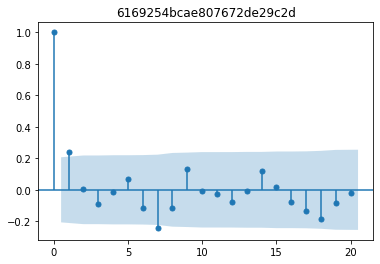

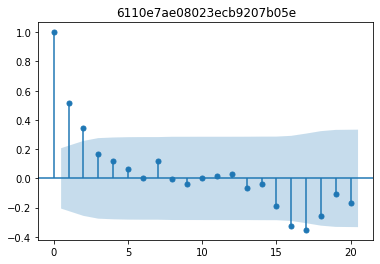

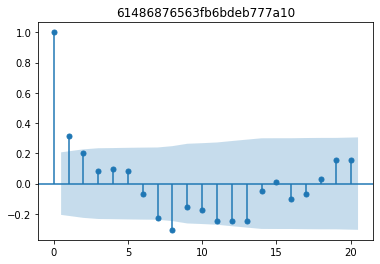

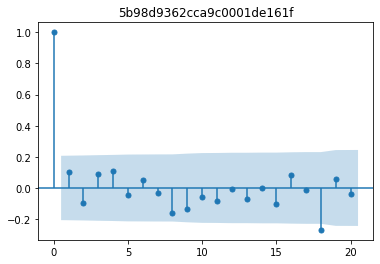

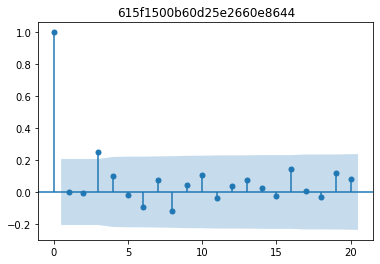

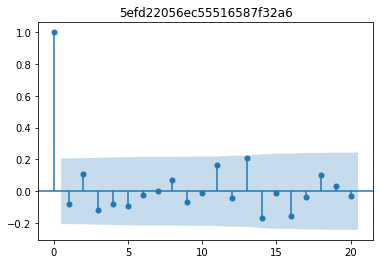

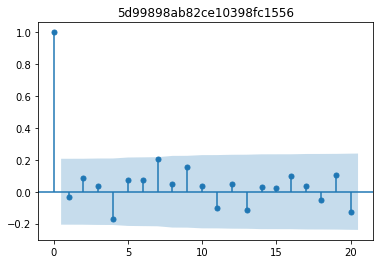

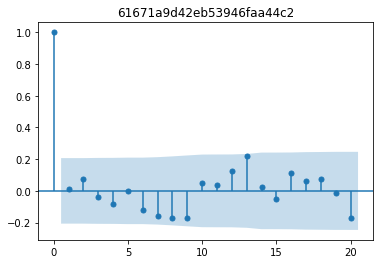

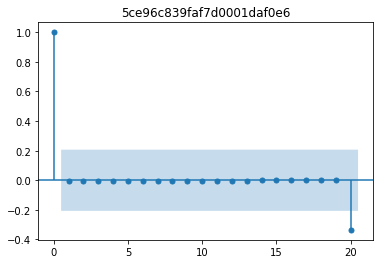

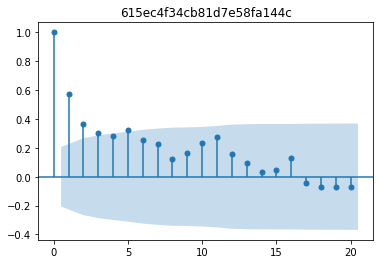

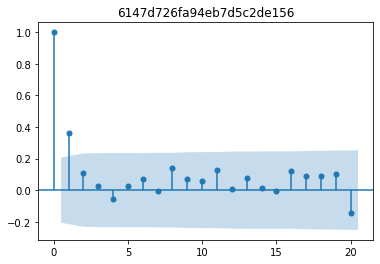

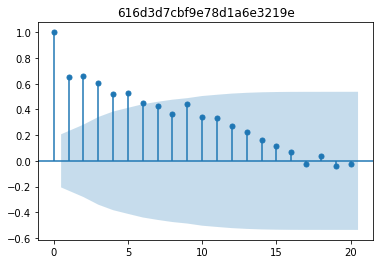

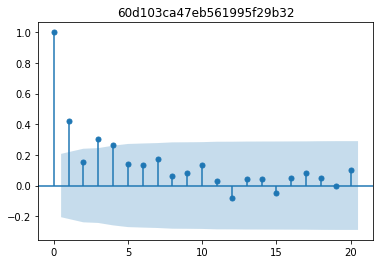

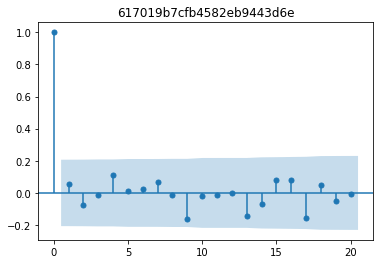

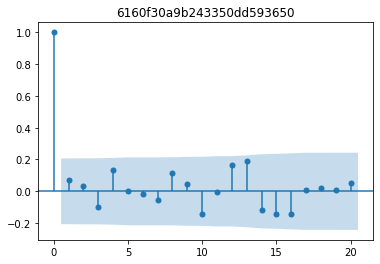

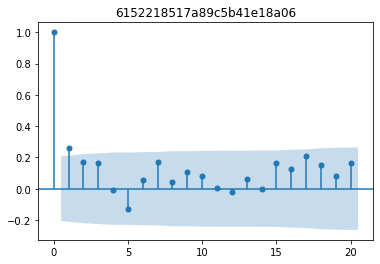

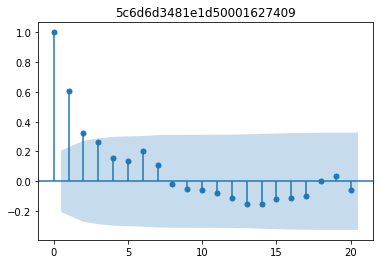

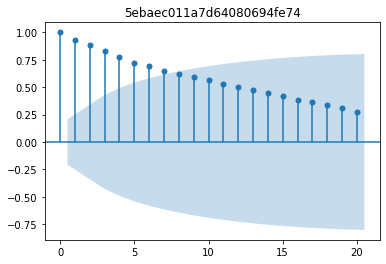

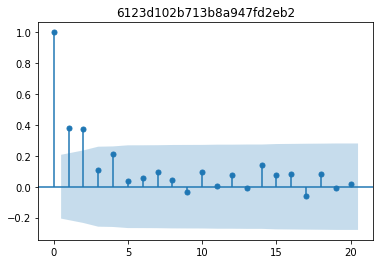

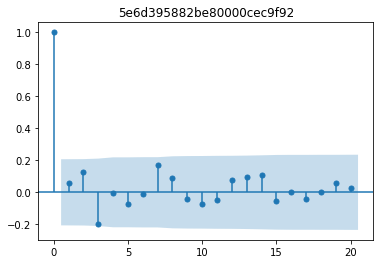

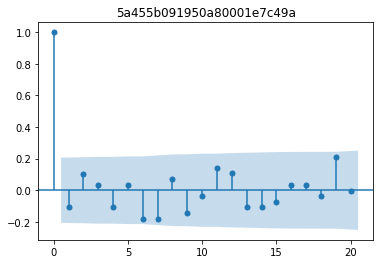

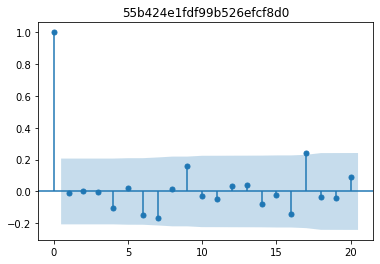

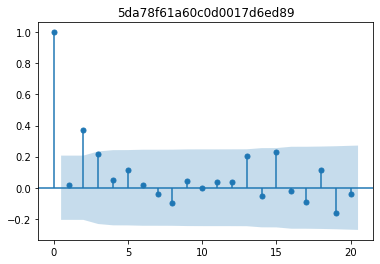

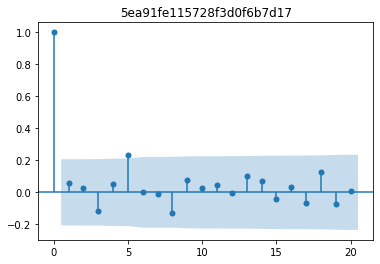

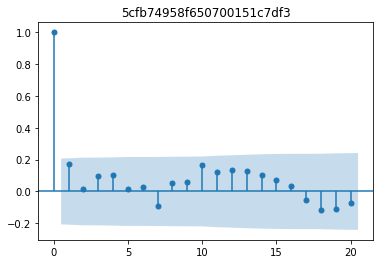

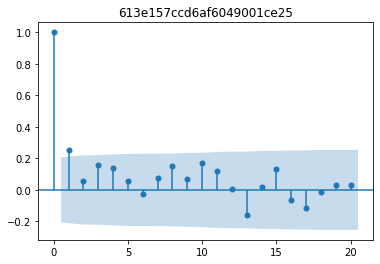

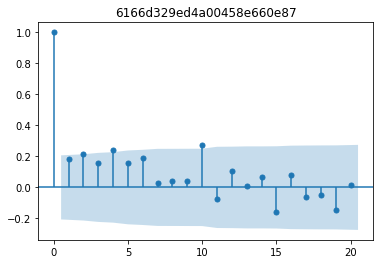

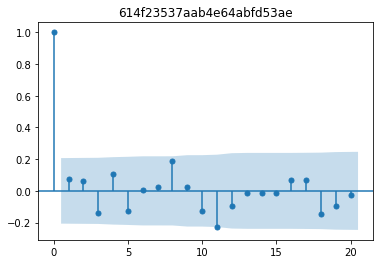

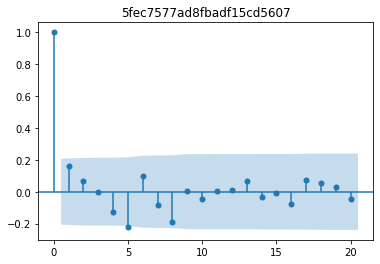

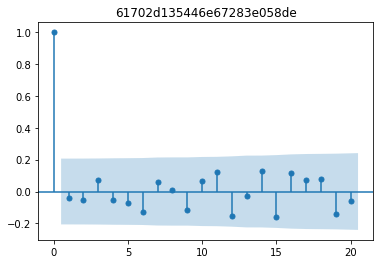

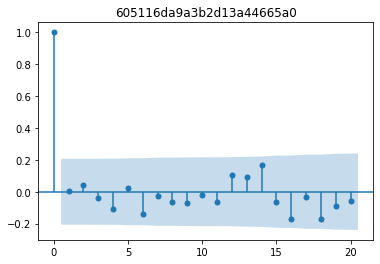

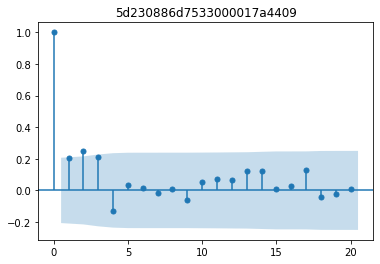

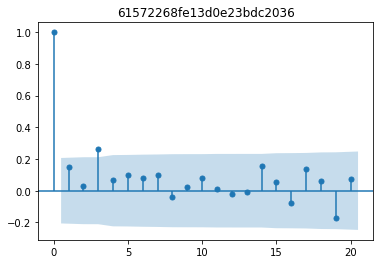

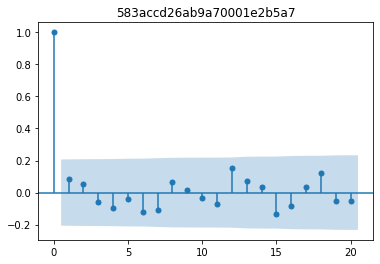

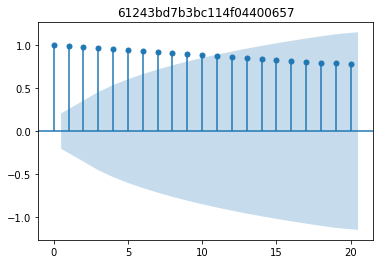

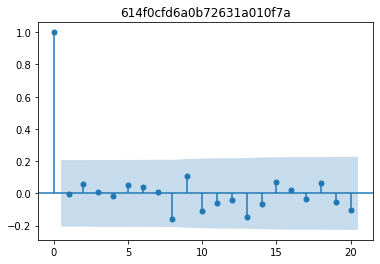

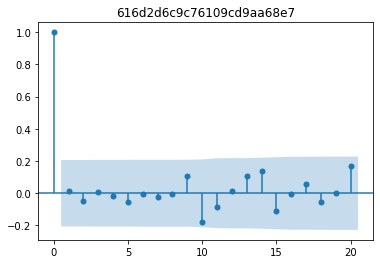

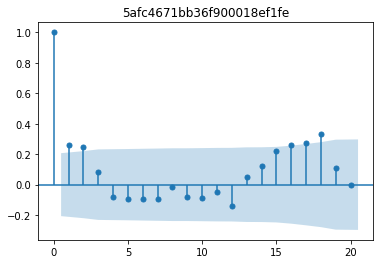

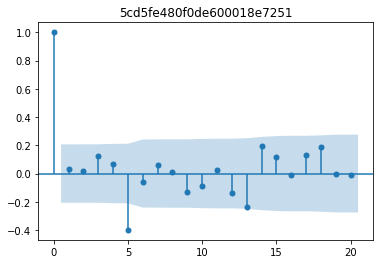

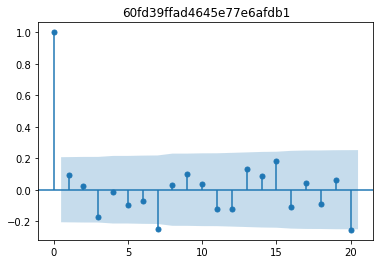

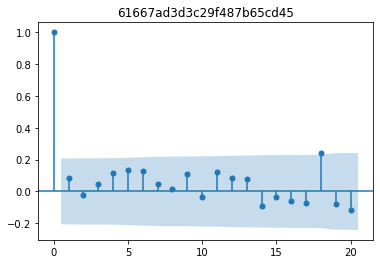

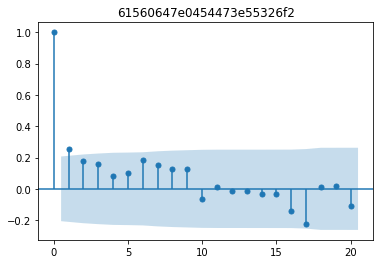

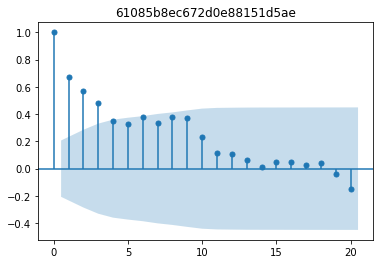

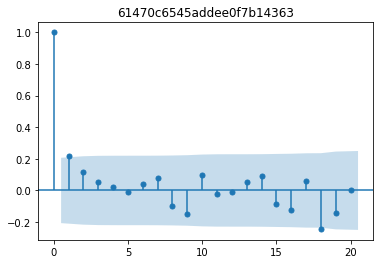

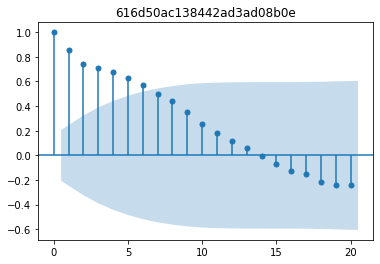

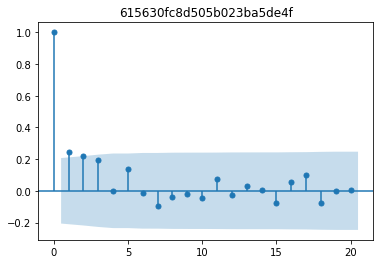

In [117]:
for uuid in uuids:
    trials = data[data['PID']==uuid].reset_index()
    plot_acf(trials['suspicion_rating'], title=uuid)

In [121]:
data[data['PID']=="616d50ac138442ad3ad08b0e"]['suspicion_rating'].values

array([0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.6, 0.6, 0.4, 0.2, 0.4,
       0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.8,
       0.8, 0.6, 0.6, 0.8, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 0.6, 0.8, 0.6, 0.6, 1. , 1. , 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.2, 0.4, 0.2, 0.2])

In [122]:
data[data['PID']=="61243bd7b3bc114f04400657"]['suspicion_rating'].values

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [123]:
data[data['PID']=="5ebaec011a7d64080694fe74"]['suspicion_rating'].values

array([0.4, 0.4, 0.4, 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0.4, 0.4, 0.4, 0.4, 0.6, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.6,
       0.6, 0.4, 0.6, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])

In [125]:
data.reset_index().to_feather("fr_param_updates.feather")